# The Cyclic Hopfield Network

**NX-465 Mini-project MP2, Spring semester 2025**

## Introduction
The Hopfield network is a classical model that helps us understand how memories are stored and retrieved in neural systems. It operates by associating stored patterns with stable fixed points; if a small error occurs, the system naturally corrects itself by converging back to the correct pattern.
In this project, we will take the Hopfield model a step further. Instead of focusing on the stationary states, we will explore stable limit cycles where the neuronal states evolve over time following a sequence of patterns. You will be implementing this extension with minimal modifications to the classical model and investigate its ability to store and retrieve sequences of patterns. Further, you will also implement the cyclic Hopfield model as a continuous dynamical system, which will be compared to the discrete system and analysed using simple dimensionality reduction techniques.
Note: the project is intended to be solved using Python without the need for any specific library (other than the usual numpy and matplotlib). You are free to use other libraries if you want.
At the bottom of the project you will find a list of resources and references for further reading.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Ex 0. Getting Started: Cyclic Hopfield model

We start with a classical Hopfield-like setup, with a network consisting of N neurons with connectivity matrix $\mathbb{w}_{ij}$ . Each neuron i has a continuously-valued state $S_i(t) \in [-1, 1]$, which updates according to
\begin{equation}
	S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)
\tag{1}
\end{equation}
where (n) denotes the iteration number and $\beta$ is the shape parameter of the transfer function. The connectivity matrix will be defined as
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

 where P ≤ N is the number of patterns that make up the connectivity. Unlike in the standard, static Hopfield model, here the patterns are not fixed points of the system, but rather points along a limit cycle. As such this system will be called a cyclic Hopfield model. We will be taking random patterns where each entry per pattern takes on a value $p^{\mu}_i \in \{-1, 1\}$ both with equal probability.

**0.1**. Write a function that generates network patterns as defined above, as a function of P and N.
As in the standard Hopfield model, we can define overlap variables both to better understand the network dynamics as well as to reduce computational complexity. For each pattern $p^{\mu}$ the corresponding overlap
variable is defined as
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}

In [4]:
def network_patterns(P, N):
    """
    Generate random network patterns.
    Input:    P = number of neurons (int)
              N = number of patterns (int)
    Output:   Matrix of wize (P, N) where each row is a pattern, and each entry is either -1 or 1.
    """
    return np.random.choice([-1, 1], size=(P, N))

**0.2**. Rewrite the right-hand side of equation (1) in terms of the patterns and the overlap variables, making use of Eqs. (2) and (3).

<span style="color:#0A74DA">

$Solution:$
Equation (1) is given by $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right)$.
Let's develop the right-hand side. First, replace $\mathbb{w}_{ij}$ using equation (2):
\begin{equation*}
	 \operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right] S_j^{(n-1)} \right)=
\end{equation*}

\begin{equation*}
	  \operatorname{tanh} \left( \beta \sum_{j=1}^{N} \frac{1}{N}[p_i^1 p_j^P]S_j^{(n-1)}+ \beta \sum_{j=1}^{N} \frac{1}{N} [\sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1}] S_j^{(n-1)} \right)
\end{equation*}
Using (3), we obtain: 
\begin{equation*}
	  \operatorname{tanh} \left( \beta \left[m^{P,(n-1)} p_i^{1}+  \sum_{\mu=2}^P m^{\mu-1, (n-1)} p_i^{\mu}\right] \right)
\end{equation*}

Consider finally that $m^{0, (n-1)} = m^{P, (n-1)}$ for cyclic consistency, we obtain:
\begin{equation*}
	 S_i^{(n)} =\operatorname{tanh} \left( \beta \sum_{j=1}^{N} w_{ij} S_j^{(n-1)} \right) = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)
\end{equation*}

Remind that 
\begin{equation}
	m^{\mu, (n)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n)}
\tag{3}
\end{equation}
Or in our case 
\begin{equation}
	m^{\mu, (n-1)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(n-1)}
\tag{3'}
\end{equation}
and
\begin{equation}
	\mathbb{w}_{ij} = \frac{1}{N}\left[p_i^1 p_j^P+ \sum_{\mu=2}^P p_i^{\mu} p_j^{\mu-1} \right]
\tag{2}
\end{equation}

**0.3**. Explain (without simulation) why this system can be considered as *cyclic*, by explaining how the network would evolve if the state of all neurons is initialised along pattern 1: $S^{(0)}_i = p^1_i$.

**Hint:**
* For this you may consider an ideal scenario where $\beta$ is sufficiently large such that $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$ and where the different patterns have no overlap between each other: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
* To manually compute the state of the system at iteration 1, first compute the overlap variables $m^{\mu, (0)}$, and combine it with the equation derived in the previous question.
* From this, Eq. (3) can be used to find $m^{\mu, (1)}$. Extrapolate your result to many iterations to answer the question.

<span style="color:#0A74DA">

$Solution:$
If we use the definition of the overlap given by (3), we have
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i S_i^{(0)}
\end{equation*}
By susbtituting $S^{(0)}_i = p^1_i$ in this equation, we obtain
\begin{equation*}
	m^{\mu, (0)} = \frac{1}{N} \sum_{i=1}^{N} p^{\mu}_i p^1_i
\end{equation*}
There is no overlap between different patterns (by hint assumption), which inplies the orthogonality of the stored patterns: $\sum_{i=1}^{N}p^{\mu}_i p^{\nu}_i = 0$ if $\mu \neq \nu$.
Therefore, we have
\begin{equation}
\left\{\begin{array}{ll}
	m^{\mu, (0)} =0 \textrm{, for } \mu \neq 1 \\
	m^{1, (0)} =1 \textrm{, otherwise}
\end{array}\right.
\tag{**}
\end{equation}

From the question 0.2, we obtained that $S_i^{(n)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (n-1)} p_i^{\mu} \right)$. Therefore, $S_i^{(1)} = \operatorname{tanh} \left( \beta \sum_{\mu=1}^P m^{\mu-1, (0)} p_i^{\mu} \right)$ and if we susbtitute the value of $m^{\mu, (0)}$ previously found, we obtain:
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta m^{0, (0)} p^{1}_i+\beta m^{1, (0)} p^{2}_i + \sum_{\mu=3}^P \beta m^{\mu-1, (0)} p_i^{\mu} \right)
\end{equation*}
which become
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right)
\end{equation*}
using (**). In addition, for large value of $\beta$, $\operatorname{tanh}(\beta x) ≈ \operatorname{sign}(x)$. Therefore,
\begin{equation*}
	S_i^{(1)} = \operatorname{tanh} \left( \beta p^{2}_i \right) ≈ \operatorname{sign}(p^{2}_i) = p^{2}_i
\end{equation*}
Similarly as $m^{\mu, (0)}$, if we want to compute $m^{\mu, (1)}$ we use the overlap definition and, this time, $S_i^{(1)} = p^{2}_i$:
\begin{equation*}
\left\{\begin{array}{ll}
	m^{\mu, (1)} =0 \textrm{, for } \mu \neq 2 \\
	m^{2, (1)} =1 \textrm{, otherwise}
\end{array}\right.
\end{equation*}

If we repeat many times this process, we will obtain $m^{3, (2)} = 1$ because $S_i^{(2)} = p_i^{3}$, $m^{4, (3)} = 1$ because $S_i^{(3)} = p_i^{4}$, $m^{5, (4)} = 1$ because $S_i^{(4)} = p_i^{5}$, ... and so indefinitely. The pattern is $m^{P, (P-1)} = 1$ because $S_i^{(P-1)} = p_i^{P}$ through the whole cycle, and return at a state $m^{1, (P)} = 1$ because $S_i^{(P)} = p_i^{1}$ at the cycle end.
Therefore, the cycle repeats indefinitely, meaning the system cycles through the stored patterns in order: $p^1$, $p^2$, ..., $p^P$, $p^1$, ...


**0.4**. Verify your prediction from the previous question with a simulation of the more general, non-ideal scenario.

* Generate P = 10 patterns using your implementation from Ex. 0.1.
* Write code that simulates the evolution of the system for N = 100 neurons, $\beta$ = 4, $n_{max}$ = 20 iterations. It will be useful to keep track of both the neural state S and the overlap variables $m^{\mu}$ for every iteration.
* **Important**: Implement the update step according to the update equation derived in Ex 0.2, instead of using Eq. (1) directly. This will strongly reduce the computational complexity and make your simulations run many times faster.
* Create a single plot showing the evolution of the P overlap variables $m^{\mu}$ over iterations, and comment on your findings.


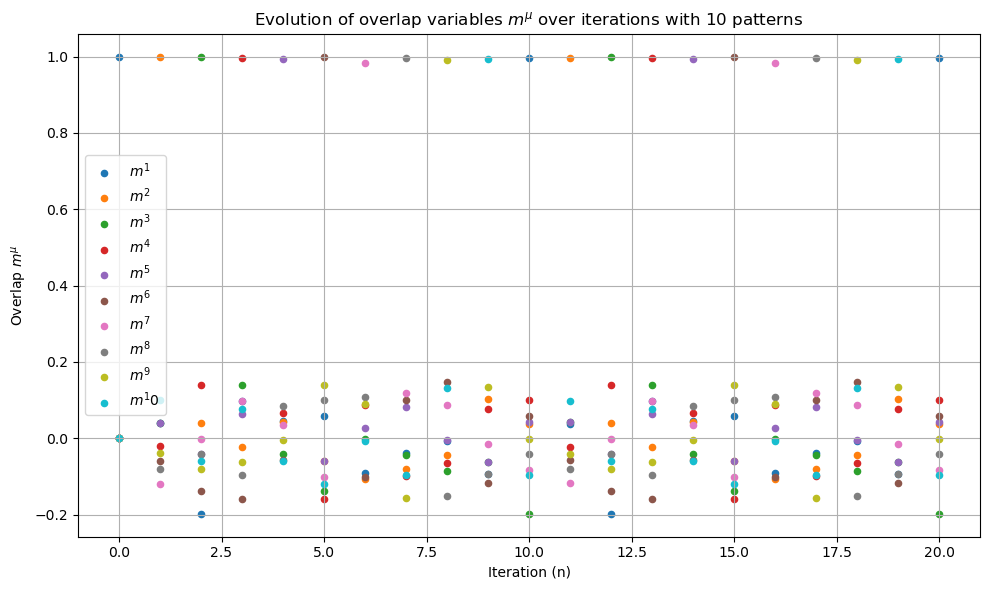

In [30]:
def cyclic_hopfield_model(P=10, N=100, beta=4, n_max=20):
     """
     Run a simulation of a cyclic hopfield model
     Input:     P = number of neurons (int)
                N = number of patterns (int)
                beta = shape of parameter of the transfer function (float)
                n_max = max number of iterations (int)
     Output:    None 
     """
     matrix_patterns = network_patterns(P, N)

     #neural state => matrix of size (timestep, neural states):
     S = np.zeros((n_max+1, N))
     S[0] = matrix_patterns[0]

     #overlap => matrix of size (timestep, patterns):
     overlaps = np.zeros((n_max+1, P))
     overlaps[0,0]=1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)

     #simulation:
     for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                      m= previous_m[mu-1]
                else:
                      m= previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n]= np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])

     #Plot the results
     plt.figure(figsize=(10, 6))
     for mu in range(P):
        #plt.plot(overlaps[:, mu], label=f"$m^{mu+1}$")# for the continuous plot
        plt.scatter(range(n_max+1), overlaps[:, mu], label=f"$m^{mu+1}$", s=20) #with the plot per points
     plt.title("Evolution of overlap variables $m^\\mu$ over iterations with {} patterns".format(P))
     plt.xlabel("Iteration (n)")
     plt.ylabel("Overlap $m^\\mu$")
     plt.legend()
     plt.grid(True)
     plt.tight_layout()
     plt.show()
cyclic_hopfield_model()

<span style="color:#0A74DA">

Answer:

In the plot, we can distinguish an oscillatory behaviour. In fact, there is a clear cyclic pattern among the overlap values $m^\mu$, particularly for one overlap peaking at each step and then dropping, with another one taking its place.
This indicates that the network is cycling through stored patterns rather than settling into one stable state.
On the graph, we can see that some high peaks on overlaps reach values close to 1. This suggests that at certain iterations, the network strongly resembles one of the stored patterns. This trend continues periodically, suggesting that the network sequentially recalls stored patterns in a loop.
Between peaks, there are non-dominant overlapping patterns that fluctuate around zero, which should indicate some noise or interference, which is expected in a non-ideal scenario (e.g. due to capacity limits, temperature/noise, or non-orthogonal patterns).

## Ex 1. Sequence storage and retrieval

Now that we have a working implementation of the cyclic Hopfield model we can evaluate some of its properties. As in the classical Hopfield network, one of the main properties of interest is the network capacity. We would like to find out how many patterns can be stored in the cycle and still be retrieved. We start by looking at what happens when we increase the number of patterns $P$ in the network.

**1.1**. Redo the simulation of Ex. 0.4 but now with P = 50 patterns. You should observe a clear difference in the dynamics of the overlap variables over iterations, with no clear cyclic behaviour. Why does this happen?

To further investigate where this pattern retrieval breaks down, we need a formal definition of correct behaviour. For this, we say that the cycle is ‘retrieved’ if the network cycles between all patterns in the cycle, in the correct order, when initialised along one of the patterns.

/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_1299/1151545077.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


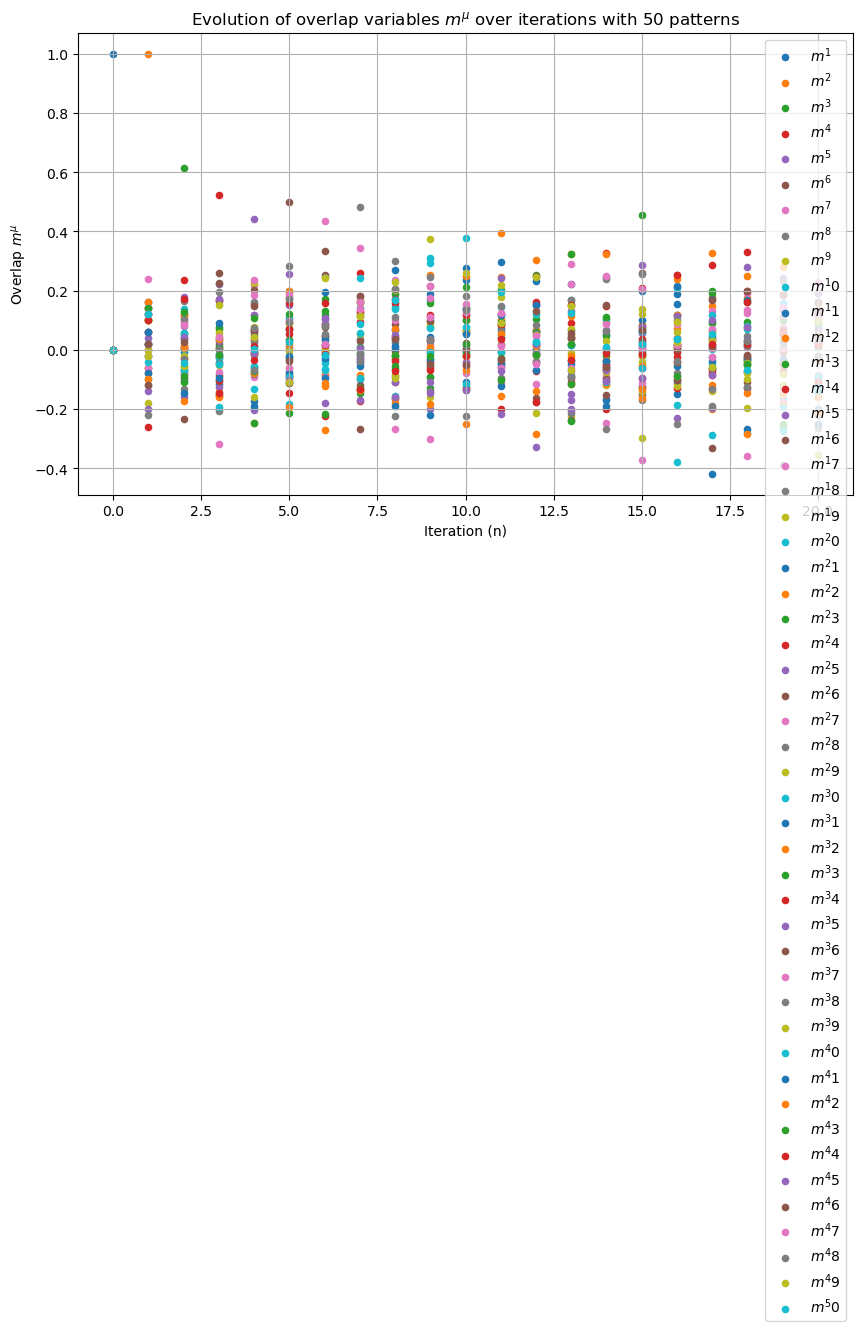

In [31]:
#use cyclic hopfiel model simulation function with P=50
cyclic_hopfield_model(50)

<span style="color:#0A74DA">

Answer:

In deed, there’s no dominant oscillation or clear recall of specific patterns in sequence, in contrast to the previous plot. All the overlaps fluctuate around zero with low amplitudes, and none stand out consistently over time.

In fact, classic hopfield networks have a capacity limit for how many patterns they can store and reliably retrieve.If the number of neurons N  is to modest, the model memory capacity cannot store a lot of patterns. (Here 100 N is to modest for 50 pattern (we have roughly the relationship $P_{max} = 0.138 N$)). 
The consequences of having a too high P according to N can be multiple:
* Interference between stored patterns.
* Cross-talk noise, preventing the system from recalling any one pattern cleanly.
* A lack of stable or cyclic attractors in the energy landscape.

To summary, with 50 stored patterns, the cyclic Hopfield network becomes overloaded, resulting in no clear recall of any pattern over time. The dynamics become chaotic and noisy, as the overlaps $m^\mu$ fluctuate randomly with no dominant memory emerging—highlighting the memory capacity limitations of associative networks.


**1.2**. Implement a way to determine if a cycle has been correctly retrieved in a simulation. 

**Hints:**
* Compute for each iteration the index of the pattern with the largest overlap. What should the sequence of indices look like for a correctly retrieved cycle?
* Checking the retrieval can be done in two ways: Either through a function that can be evaluated at the end of the simulation, or through a check that is run every iteration. The latter can be useful for implementing early stopping of the simulation.

The cycle capacity of the network is defined as the maximum load $\alpha = P/N$ for which the cycle can still be retrieved. Note that due to the randomness of the patterns there is generally no hard boundary between retrieval and non-retrieval. Next we will be computing and comparing the cycle capacity of two networks with different sizes.

In [7]:
#Function that can be evaluated at the end of the simulation
def is_correct_cycle_retrieved(overlaps, start_mu=0, tolerance=0):
    """
    Check if the system follows the correct cyclic pattern retrieval.
    Input:  overlaps = np.array of shape (n_max+1, P)
            start_mu = index of the starting pattern (int)
            tolerance = number of mismatches to tolerate befor declaring failure (int)
    Output: True if cycle retrieved correctly, False otherwise (bool)
            dominant_indices = detected dominant pattern indices over time (list[int])
    """
    n_steps,P = overlaps.shape
    dominant_indices =np.argmax(overlaps, axis=1) # pattern with max overlap at each step
    expected_indices = [(start_mu + i) % P for i in range(n_steps)]
    
    mismatches = sum(d != e for d, e in zip(dominant_indices, expected_indices))
    
    return mismatches <= tolerance, dominant_indices



In [8]:
#New implementation of cyclic_hopfield_model() with no diplay but with check of correct cyclic pattern retrieval
def cyclic_hopfield_model(P=10, N=100, beta=4, n_max=20):
     """
     Run a simulation of a cyclic hopfield model
     Input:     P = number of neurons (int)
                N = number of patterns (int)
                beta = shape of parameter of the transfer function (float)
                n_max = max number of iterations (int)
     Output:    None 
     """
     matrix_patterns = network_patterns(P, N)

     #neural state => matrix of size (timestep, neural states):
     S = np.zeros((n_max+1, N))
     S[0] = matrix_patterns[0]

     #overlap => matrix of size (timestep, patterns):
     overlaps = np.zeros((n_max+1, P))
     overlaps[0,0]=1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)

     #simulation:
     for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                      m= previous_m[mu-1]
                else:
                      m= previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n]= np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])
    
     #Check correct pattern retrieval
     success, dominant_seq = is_correct_cycle_retrieved(overlaps, start_mu=0)
     return success

#use for P= 10 as question 0.4
retrieved_state10 = cyclic_hopfield_model(10)
print("Case P=10 retrieved state: ", retrieved_state10)
#use for P =50 as question 1.1
retrieved_state50 = cyclic_hopfield_model(50)
print("Case P=50 retrieved state: ", retrieved_state50)

Case P=10 retrieved state:  True
Case P=50 retrieved state:  False


<span style="color:#0A74DA">

We return to the results obtained in questions 0.4 and 1.1 as expected. P =50 shows no cyclic behavior, unlike the case of P =10.

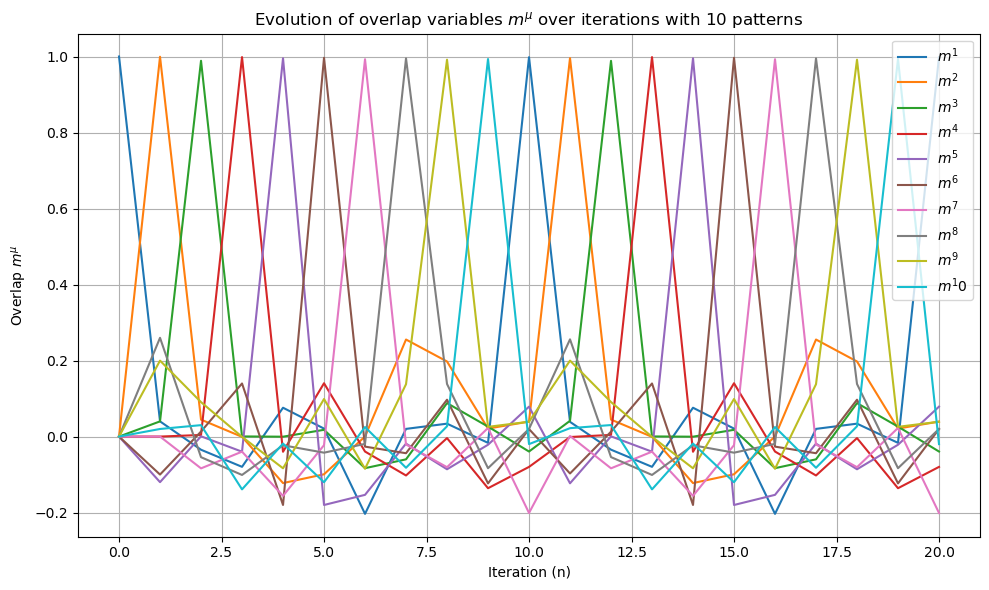

Cycle broken at iteration 6: expected 6, got 48


/var/folders/kd/rc_r8j55289115b7qptd65yh0000gq/T/ipykernel_1299/657233438.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


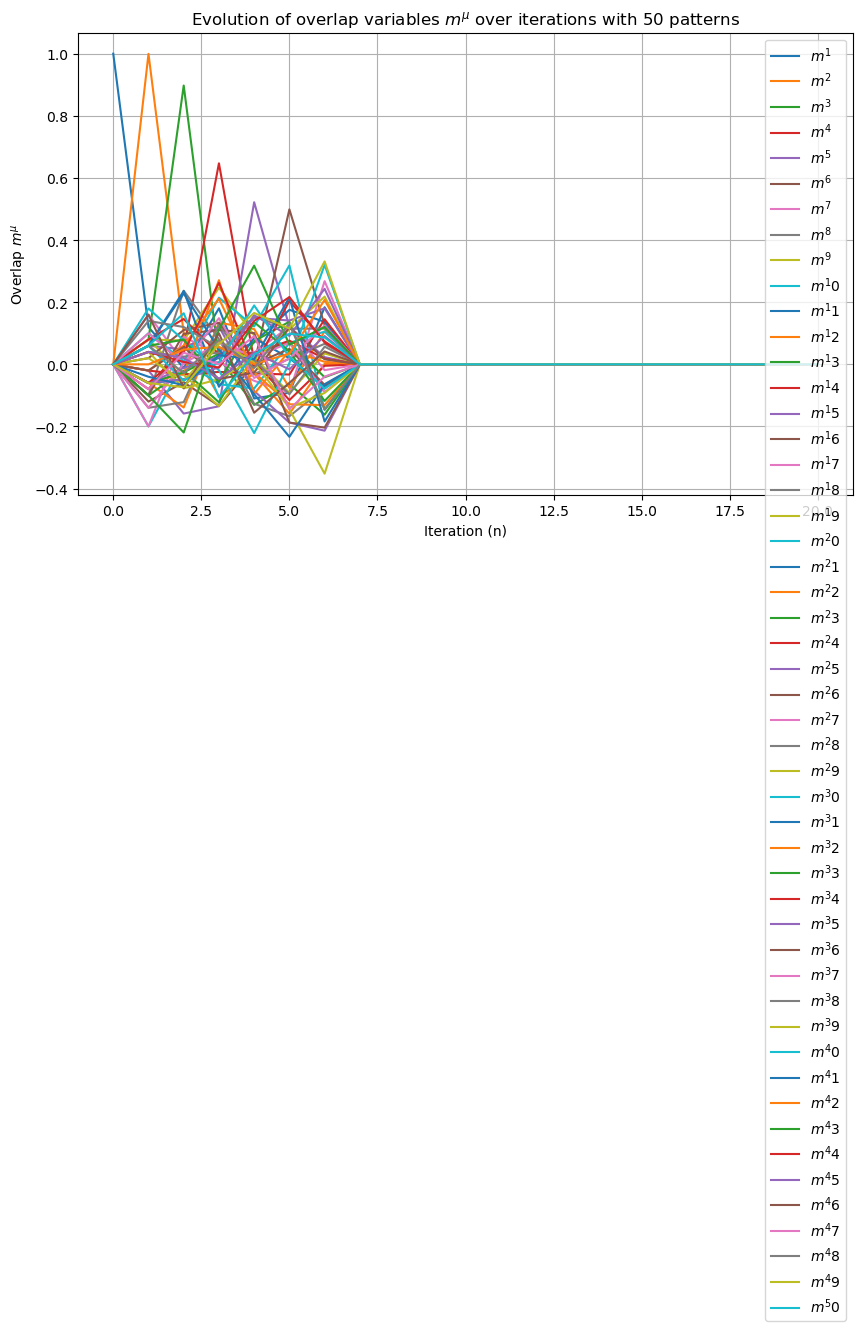

In [9]:
# Version of cyclic_hopfield_model() with integrated check of cyclic retrieval correctness for early stopping
# Per-iteration check of correct cyclic order
def is_cycle_still_correct(dominant_indices, start_mu=0):
    """
    Check if the system follows the correct cyclic pattern retrieval.
    Input:  dominant_indices = Record dominant pattern for this iteration (list)
            start_mu = index of the starting pattern (int)
    Output: True if the dominant indices are following the correct cyclic order so far.
    """
    expected_sequence = [(start_mu + i) % len(dominant_indices) for i in range(len(dominant_indices))]
    return all(dominant_indices[i] == expected_sequence[i] for i in range(len(dominant_indices)))

def cyclic_hopfield_model_early_stopping(P=10, N=100, beta=4, n_max=20):
     """
     Run a simulation of a cyclic hopfield model including early stopping
     Input:     P = number of neurons (int)
                N = number of patterns (int)
                beta = shape of parameter of the transfer function (float)
                n_max = max number of iterations (int)
     Output:    None 
     """
     matrix_patterns = network_patterns(P, N)
     dominant_indices = [0]  # Track which pattern is dominant at each step    

     #neural state => matrix of size (timestep, neural states):
     S = np.zeros((n_max+1, N))
     S[0] = matrix_patterns[0]

     #overlap => matrix of size (timestep, patterns):
     overlaps = np.zeros((n_max+1, P))
     overlaps[0,0]=1 #overlap between a pattern and itself is 1, other are 0 (patterns supposed as orthogonal)

     #simulation:
     for n in range(1, n_max+1):
        previous_m = overlaps[n-1]
        input_tanh = np.zeros(N)
        for mu in range(P):
                if mu>0:
                      m= previous_m[mu-1]
                else:
                      m= previous_m[-1] #to return to initial state => cycle
                input_tanh += m * matrix_patterns[mu]
        S[n]= np.tanh(input_tanh*beta)
        for mu in range(P): #mu is an index for 1 to p
                overlaps[n, mu] = 1/N * np.dot(matrix_patterns[mu], S[n])
  
           
        # Record dominant pattern for this iteration
        dominant_mu =np.argmax(overlaps[n])
        dominant_indices.append(dominant_mu)

        # Check if cycle is correct so far
        expected_sequence = [(0 + i) % P for i in range(len(dominant_indices))]
        if dominant_indices != expected_sequence:
            print(f"Cycle broken at iteration {n}: expected {expected_sequence[n]}, got {dominant_mu}")
            dominant_indices.pop()  # Remove invalid one
            break
    
    
    
     plt.figure(figsize=(10, 6))
     for mu in range(P):
        plt.plot(overlaps[:, mu], label=f"$m^{mu+1}$")
     plt.title("Evolution of overlap variables $m^\\mu$ over iterations with {} patterns".format(P))
     plt.xlabel("Iteration (n)")
     plt.ylabel("Overlap $m^\\mu$")
     plt.legend()
     plt.grid(True)
     plt.tight_layout()
     plt.show()

#test with P= 10 as question 0.4
cyclic_hopfield_model_early_stopping(10)
#test with P =50 as question 1.1
cyclic_hopfield_model_early_stopping(50)

<span style="color:#0A74DA">

Again, we obtain similar results to questions 0.4 and 1.1 as expected. P =50 shows no cyclic behavior, unlike the case of P =10.

**1.3**. For $N = 100$ and for $N = 1000$, run a simulation for $\alpha \in \{0.05,0.1,0.15,...,0.4\}$, $n_{max} = 2·P$, with 10 repetitions per $\alpha$ to get a more accurate estimate of the retrieval probability. Produce a single plot showing for both networks the fraction of retrieved cycles as a function of the network load $\alpha$. Roughly what is the cycle capacity for each network?


Running for N = 100
P = 5, alpha = 0.05, Success Rate: 1.00
P = 10, alpha = 0.10, Success Rate: 1.00
P = 15, alpha = 0.15, Success Rate: 1.00
P = 20, alpha = 0.20, Success Rate: 1.00
P = 25, alpha = 0.25, Success Rate: 0.40
P = 30, alpha = 0.30, Success Rate: 0.20
P = 35, alpha = 0.35, Success Rate: 0.10
P = 40, alpha = 0.40, Success Rate: 0.00

Running for N = 1000
P = 50, alpha = 0.05, Success Rate: 1.00
P = 100, alpha = 0.10, Success Rate: 1.00
P = 150, alpha = 0.15, Success Rate: 1.00
P = 200, alpha = 0.20, Success Rate: 1.00
P = 250, alpha = 0.25, Success Rate: 0.90
P = 300, alpha = 0.30, Success Rate: 0.00
P = 350, alpha = 0.35, Success Rate: 0.00
P = 400, alpha = 0.40, Success Rate: 0.00


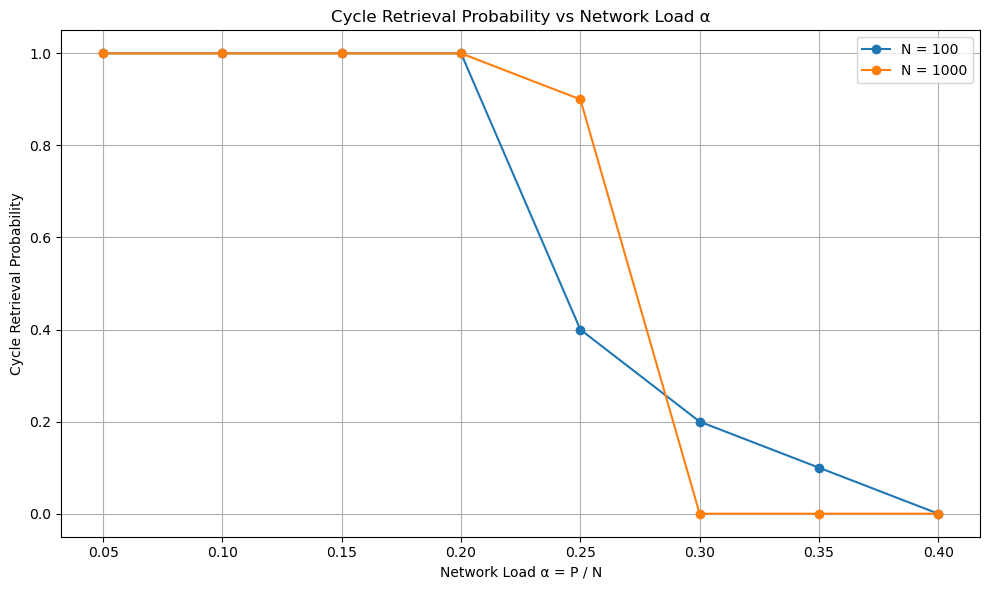

In [10]:
# Run multiple simulations per alpha for two network sizes
def run_capacity_experiment(N_values=[100, 1000], alphas=np.arange(0.05, 0.45, 0.05), n_trials=10):
    """
    Run multiple simulations per different values of alpha.
    Input:  N_values = list of the different number of neurons to test (list[int])
            alphas = alpha values to test (ndarray)
    Output: results= list of the retrieved fraction cycles for each different test
            alphas = alpha values to test (ndarray)
    """
    beta = 4
    results = {N: [] for N in N_values}

    for N in N_values:
        print(f"\nRunning for N = {N}")
        for alpha in alphas:
            P = int(alpha * N)
            successes = 0
            for trial in range(n_trials):
                if cyclic_hopfield_model(P=P, N=N, beta=beta, n_max=2*P):
                    successes += 1
            retrieval_prob = successes / n_trials
            print(f"P = {P}, alpha = {alpha:.2f}, Success Rate: {retrieval_prob:.2f}")
            results[N].append(retrieval_prob)
    
    return results, alphas


def plot_results(results, alphas):
    """
    Plot a graph showing the results per alpha values.
    Input:  results= list of the retrieved fraction cycles for each different test
            alphas = alpha values to test (ndarray)
    Output: None
    """
    plt.figure(figsize=(10, 6))
    for N, retrievals in results.items():
        plt.plot(alphas, retrievals, marker='o', label=f"N = {N}")
    plt.title("Cycle Retrieval Probability vs Network Load α")
    plt.xlabel("Network Load α = P / N")
    plt.ylabel("Cycle Retrieval Probability")
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the experiment
results, alphas = run_capacity_experiment()
plot_results(results, alphas)

<span style="color:#0A74DA">

Answer:

The graph obtained shows us that the probability of recovery of a cycle is 1 for low values of $\alpha$, then decreases sharply as $\alpha$ increases.
Roughly estimating that the capacity of the cycle is the largest value of $\alpha$ for which the probability of recovery is still 1 or very close to 1, we obtain that for N=1000, the capacity is 0.25 and for N=100 the capacity is 0.20. Thus, the model with N=100 has a smaller capacity than the N=1000 model. This is in line with what we would expect from a model with more neurons.

**1.4**. If all went well, you should see in Ex. 1.3 that the more neurons there are in the network, the sharper the transition becomes between retrieval and non-retrieval. Explain where this difference comes from.

<span style="color:#0A74DA">

Answer:
As N tends towards infinity, the fluctuations due to randomness average out more effectively.Therefore, the result is more predictable and stable behavior, with sharper transitions between phases. In smaller networks, random fluctuations have a more perceptible effect, creating a smoother, more gradual transition.



**1.5**. (Bonus) Above we have considered a network with only a single stored cycle. However, there is no reason we can’t implement multiple cycles at the same time. Construct a network that stores two cycles simultaneously, each with length $P/2$ (where $P$ is even), each of which can be retrieved separately based on the initialisation of the network. Find a $P$, $N$ for which this works, and produce a set of plots to show that initialising into a pattern in cycle 1 retrieves cycle 1 without activating cycle 2, and vice versa. For this, show for each conditions the overlap variables for the patterns in the two cycles separately.

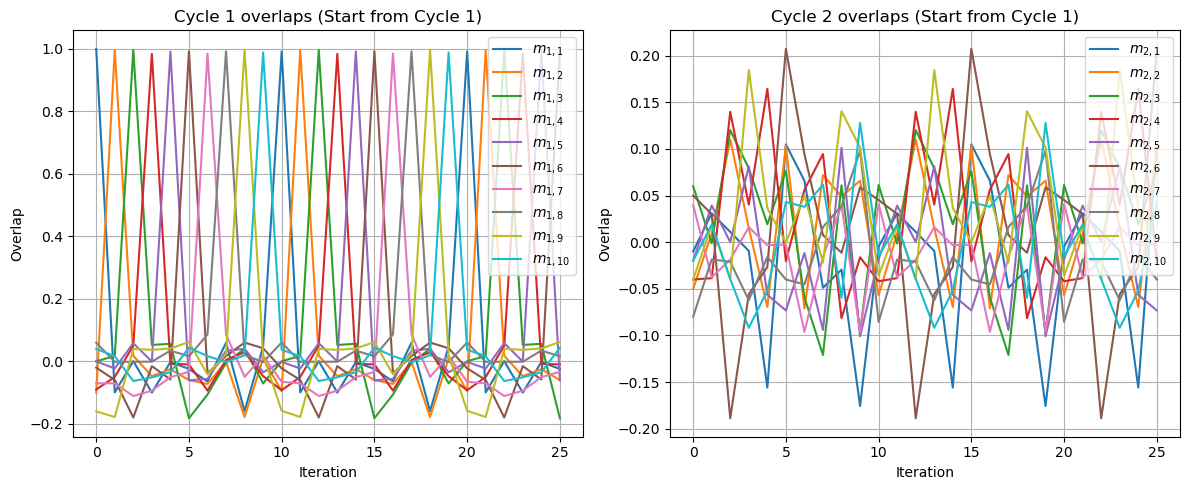

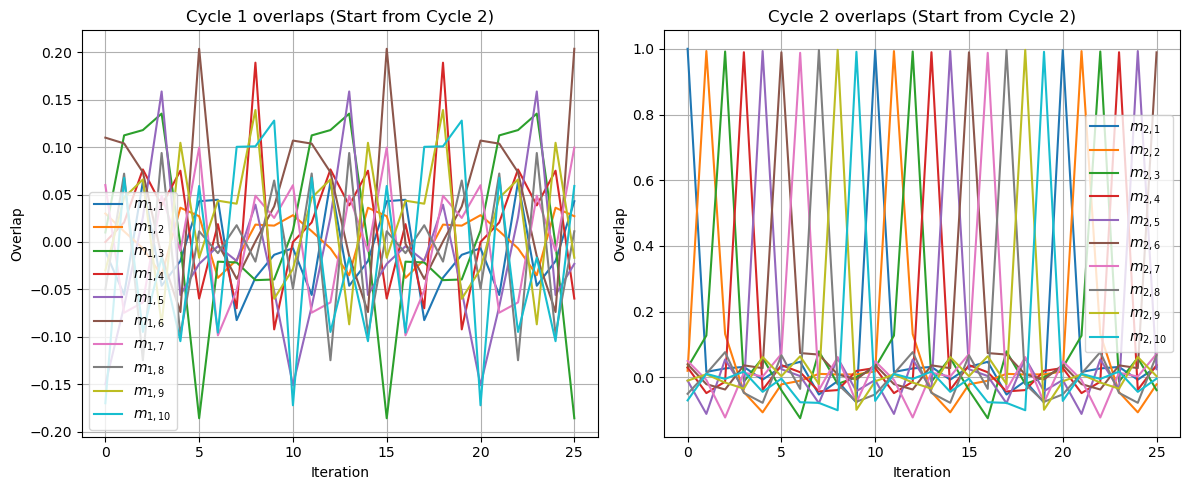

In [11]:
def generate_two_cycles(P, N):
    """
    Generate two different cycles.
    Input:  P = number of neurons (int)
            N = number of patterns (int)
    Output: patterns_cycle1 = Matrix of size (P/2, N) for cycle 1 where each row is a pattern, and each entry is either -1 or 1
            patterns_cycle2 = Matrix of size (P/2, N) for cycle 2 where each row is a pattern, and each entry is either -1 or 1
    """
    P_half = P // 2
    patterns_cycle1 = np.random.choice([-1, 1], size=(P_half, N))
    patterns_cycle2 = np.random.choice([-1, 1], size=(P_half, N))
    return patterns_cycle1, patterns_cycle2

def build_weight_matrix_dual_cycles(patterns1, patterns2):
    """
    Builds a weight matrix from two cycles
    Input:  patterns1 = Matrix of size (P/2, N) which represents the first cycle (ndarray)
            patterns2 = Matrix of size (P/2, N) which represents the second cycle (ndarray)
    Output: W/N = Matrix of synaptic weights of sizw (N, N) normalized by the number of neurons
    """
    N = patterns1.shape[1]
    P_half = patterns1.shape[0]
    W = np.zeros((N, N))

    # contributions from cycle 1
    for mu in range(P_half):
        W += np.outer(patterns1[(mu + 1) % P_half], patterns1[mu])
    
    # contributions from cycle 2
    for mu in range(P_half):
        W += np.outer(patterns2[(mu + 1) % P_half], patterns2[mu])
    
    return W / N

def simulate_cycle(patterns1, patterns2, W, init_pattern, beta=4, n_max=20):
    """
    Simulate the evolution of a network with two cycles
    Input:  patterns1 = Matrix of size (P/2, N) which represents the first cycle (ndarray)
            patterns2 = Matrix of size (P/2, N) which represents the second cycle (ndarray)
            W = Matrix of synaptic weights of size (N, N)
            init_pattern = initial pattern of size (N,) (ndarray)
            beta = inverse the temperature/control de slope of the tanh function (float)
            n_max = maximal number of iterations (int)
    Ouput:  overlaps1 = Matrix of size (n_max+1, P/2) of the overlaps of cycle 1 (ndarray)
            overlaps2 = Matrix of size (n_max+1, P/2) of the overlaps of cycle 2 (ndarray)
    """
    P_half = patterns1.shape[0]
    P = 2 * P_half
    N = patterns1.shape[1]

    S = np.zeros((n_max + 1, N))
    S[0] = init_pattern

    overlaps1 = np.zeros((n_max + 1, P_half))
    overlaps2 = np.zeros((n_max + 1, P_half))

    for mu in range(P_half):
        overlaps1[0, mu] = np.dot(S[0], patterns1[mu]) / N
        overlaps2[0, mu] = np.dot(S[0], patterns2[mu]) / N

    for n in range(1, n_max + 1):
        S[n] = np.tanh(beta * W @ S[n - 1])
        for mu in range(P_half):
            overlaps1[n, mu] = np.dot(S[n], patterns1[mu]) / N
            overlaps2[n, mu] = np.dot(S[n], patterns2[mu]) / N

    return overlaps1, overlaps2

def plot_dual_cycle(overlaps1, overlaps2, label):
    """
    Plot the overlaps evolution of the given cycles
    Input:  overlaps1 = Matrix of size (n_max+1, P/2) of the overlaps of cycle 1 (ndarray)
            overlaps2 = Matrix of size (n_max+1, P/2) of the overlaps of cycle 2 (ndarray)
            label = title of the graph (str)
    """
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for mu in range(overlaps1.shape[1]):
        plt.plot(overlaps1[:, mu], label=f"$m_{{1,{mu+1}}}$")
    plt.title(f"Cycle 1 overlaps ({label})")
    plt.xlabel("Iteration")
    plt.ylabel("Overlap")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for mu in range(overlaps2.shape[1]):
        plt.plot(overlaps2[:, mu], label=f"$m_{{2,{mu+1}}}$")
    plt.title(f"Cycle 2 overlaps ({label})")
    plt.xlabel("Iteration")
    plt.ylabel("Overlap")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


P = 20  
N = 200  
beta = 4
n_max = 25

# Generate and simulate
patterns1, patterns2 = generate_two_cycles(P, N)
W = build_weight_matrix_dual_cycles(patterns1, patterns2)

# Simulate retrieval from pattern in cycle 1
overlaps1_a, overlaps2_a = simulate_cycle(patterns1, patterns2, W, patterns1[0], beta, n_max)
plot_dual_cycle(overlaps1_a, overlaps2_a, label="Start from Cycle 1")

# Simulate retrieval from pattern in cycle 2
overlaps1_b, overlaps2_b = simulate_cycle(patterns1, patterns2, W, patterns2[0], beta, n_max)
plot_dual_cycle(overlaps1_b, overlaps2_b, label="Start from Cycle 2")


<span style="color:#0A74DA">

Answer:

We can see that initialising into a pattern in cycle 1 retrieves cycle 1 (clean cycling behavior) without activating cycle 2 (stay near zero), and vice versa as expected.
This shows that both cycles coexist independently in the network and the system retrieves the correct one based on the initial state.

## Ex 2. Continuous dynamical system

In this section we will be extending the cyclic Hopfield model from Ex. 0 and 1 as a continuous dynamical
system. That is, we will replace the update rule of Eq. (1) defined on discrete time points by a differential
equation defined for continuous time. The state of neuron i will be replaced from the variable S(n) to the i
variable $x_i(t) \in [−1, 1]$, where t denotes time, to differentiate it from the discrete system. The dynamics of neuron i are given by an ordinary differential equation on the state
\begin{equation}
	\tau \frac{dx_i}{dt}(t) = -x_i(t) + \tanh \left( \beta \sum_{j=1}^{N} w_{ij} x_j(t - \tau_{\text{delay}}) \right)
\tag{4}
\end{equation}
where $\tau$ is the time constant of the dynamics and $\tau_{delay}$ is the interaction delay between neurons, and all other parameters are as before. Unless mentioned otherwise, we will use $\beta = 4$, $\tau = 5$ ms and $\Delta t = 0.5$ ms, which is the spacing of time points at which the network will be evaluated. Convince yourself that this equation corresponds to a continuous version of the update rule in Eq. (1).

In this continuous setup we can again define our overlap variables
\begin{equation}
	m^{\mu}(t) = \frac{1}{N} \sum_{i=1}^{N} p_i^{\mu} x_i(t)
\tag{5}
\end{equation}
to help us intuitively understand the dynamics and strongly reduce the computational complexity in the
update step.

**2.1**. Simulate the dynamics of $N = 100$ neurons with minimal synaptic delay ($\tau_{delay} = \Delta t = 0.5$ ms), connected through $P = 10$ patterns for $T = 100$ ms, with initial condition $x_i(0) = p_1^i$ (the first pattern). What do you observe?
**Hints:**
* Write a method that runs the evolution of the neuronal states, according to Eq. (4) and making use of the overlap variables to reduce the computational cost. It should take as an argument the initial state $x_i(t = 0)$, and return the state of all neurons for all time steps. You may assume that the state of the neurons before the start of the simulation is constant ($x_i(t) = x_i(0)$ for $t < 0$).
* Eq. (4) can be integrated directly using the forward Euler method, with discrete time steps $t = t_0, t_1, . . . (t_k = k · \Delta t)$. It gives the following update rule:
\begin{equation}
    x_i(t_{k+1}) = x_i(t_k) + \Delta t \frac{dx_i}{dt}(t_k)
\tag{6}
\end{equation}
* Plot the time evolution of the P overlap variables $m^\mu(t)$ as a function of time in one plot.

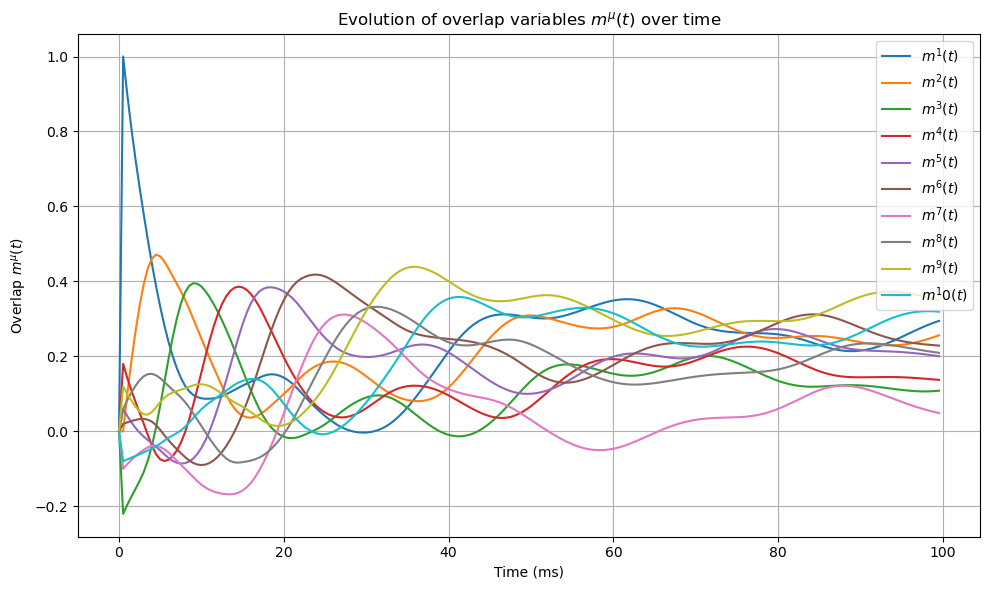

In [33]:
def build_weight_matrix(patterns):
    """
    Build the weight matrix from cyclic connections of patterns.
    Input:  patterns= Matrix of size (P, N) with each row that represents a pattern (np.ndarray)
    Output: W/N = Weight matrix of size (N, N) (np.ndarray)
    """
    P, N = patterns.shape
    W = np.zeros((N, N))
    for mu in range(P):
        W += np.outer(patterns[(mu + 1) % P], patterns[mu])
    return W / N

def simulate_continuous_dynamics(W, patterns, x0, beta=4, tau=5, t_delay=0.5, dt=0.5, T=100):
    """
    Simulate the continuous-time dynamics of the cyclic Hopfield model.
    Input:  
            W =  Matrix of synaptic weights of size (N, N). (np.ndarray)
            patterns = Matrix of patterns of size (P, N), each row representing a pattern. (np.ndarray)
            x0= Initial state of the network, vector of size (N, ). (float)
            beta = Inverse of temperature, influences tanh slope. (float)
            tau =System time constant. (float)
            t_delay = Delay (in ms) in network feedback. (float)
            dt= Simulation time step (in ms). (float)
            T=  Total simulation time (in ms). (float)
    Ouput:  
            x =Network status evolution, table (time_steps, N). (np.ndarray)
            overlaps = Time overlaps with each pattern, array (time_steps, P). (np.ndarray)
            np.arange(time_steps) * dt = Table of simulation times (in ms), size (time_steps, ). (np.ndarray)
    """
    N = W.shape[0]
    P = patterns.shape[0]
    time_steps = int(T / dt)
    delay_steps = int(t_delay / dt)

    x = np.zeros((time_steps, N))
    overlaps = np.zeros((time_steps, P))

    # Ensure all history before delay is filled with x0
    for k in range(delay_steps + 1):
        x[k] = x0.copy()

    # Compute initial overlaps at t = 0
    for mu in range(P):
        overlaps[delay_steps, mu] = np.dot(patterns[mu], x[delay_steps]) / N

    for k in range(delay_steps, time_steps - 1):
        delayed_input = x[k - delay_steps]
        tanh_input = np.tanh(beta * (W @ delayed_input))
        dx_dt = (-x[k] + tanh_input) / tau
        x[k + 1] = x[k] + dt * dx_dt

        for mu in range(P):
            overlaps[k + 1, mu] = np.dot(patterns[mu], x[k + 1]) / N

    return x, overlaps, np.arange(time_steps) * dt


N = 100
P = 10
T = 100      
dt = 0.5     
t_delay = 0.5  
tau = 5      
beta = 4

# Generate patterns and weights
patterns = network_patterns(P, N)
W = build_weight_matrix(patterns)

# Initial state = first pattern
x0 = patterns[0]

# Run simulation
x, overlaps, time = simulate_continuous_dynamics(W, patterns, x0, beta, tau, t_delay, dt, T)


plt.figure(figsize=(10, 6))
for mu in range(P):
    plt.plot(time, overlaps[:, mu], label=f"$m^{mu+1}(t)$")
plt.xlabel("Time (ms)")
plt.ylabel("Overlap $m^\\mu(t)$")
plt.title("Evolution of overlap variables $m^\\mu(t)$ over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<span style="color:#0A74DA">

Answer:

Note first that in this graph, each line corresponds to an overlap variable $m^\mu(t)$, measuring the proximity of the system to the $\mu$-th pattern at time $t$.

In the initial state, the overlap variable $m^1(t)$ dominates. Indeed, the blue curve $m^1(t)$ starts at 1.0, which confirms that the system is initialized in pattern 1. All other overlaps are close to zero at the beginning, which is normal since the network has not had time to evolve towards other patterns.

Then, as time passes, other overlapping variables $m^\mu(t)$ start to increase. This is because the cyclic weight matrix is designed to move from one pattern to another:
The network "wants" to move from $p^1$→$p^2$→⋯→$p^P$. So we see cyclic recovery by gradually increasing $m^\mu(t)$. The plot reflects a traveling wave of retrieval, where the network state gradually moves from one pattern to the next.

At around 20-30 ms, all $m^\mu(t)$ values have increased and begin to stabilize. Thus, the network no longer remains fully aligned with model 1 and enters a mixed state where it approaches a limit cycle where several schemes are partially active in sequence.

Finally, after ~60 ms, the overlaps seem to stabilize. At this point, the network reaches a stable attractor. Depending on weights/deadlines, the network be stuck in a mixed state where complete transitions are damped. Therefore, we have a situation where the network doesn’t fully transition from one pattern to the next — instead, it remains in a "blended" or "ambiguous" state where multiple patterns are partially active at the same time.


**2.2**. Now add synaptic delay to the network by setting $\tau_{delay} = 2 · \tau$ and run the network again. You should now observe cyclic dynamics on the level of overlap variables. Produce a plot similar to that of the previous exercise, and explain intuitively why the synaptic delay is necessary for this cyclic behaviour. Roughly how much time does it take to complete a full cycle in terms of network parameters?

Now that we have a working setup we can again evaluate its properties, such as the cycle capacity as defined in Exercise 1.

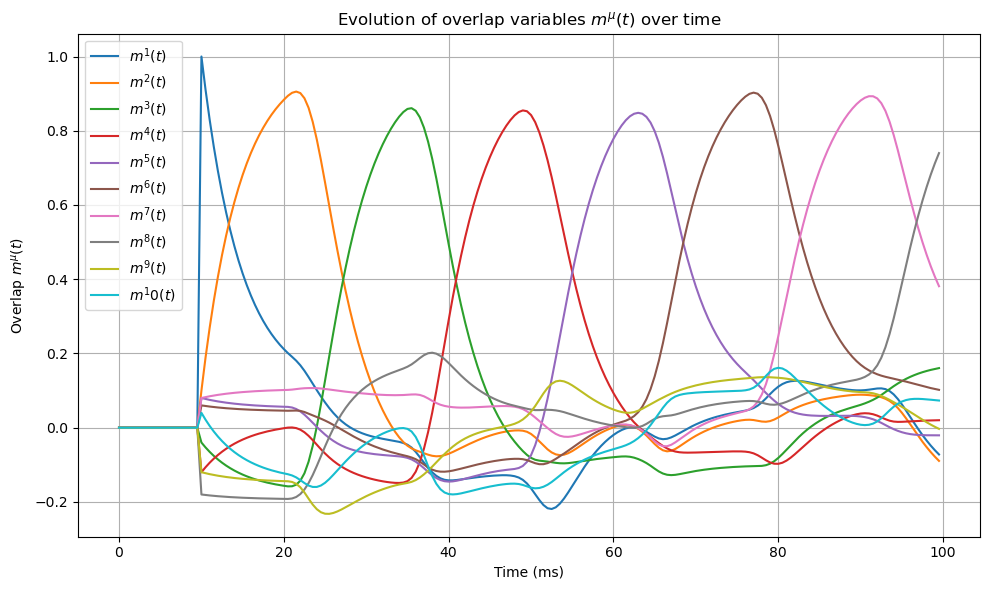

In [20]:
N = 100
P = 10
T = 100      
dt = 0.5     
tau = 5      
t_delay = 2*tau  
beta = 4


patterns = network_patterns(P, N)
W = build_weight_matrix(patterns)


x0 = patterns[0]


x, overlaps, time = simulate_continuous_dynamics(W, patterns, x0, beta, tau, t_delay, dt, T)


plt.figure(figsize=(10, 6))
for mu in range(P):
    plt.plot(time, overlaps[:, mu], label=f"$m^{mu+1}(t)$")
plt.xlabel("Time (ms)")
plt.ylabel("Overlap $m^\\mu(t)$")
plt.title("Evolution of overlap variables $m^\\mu(t)$ over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<span style="color:#0A74DA">

Answer:

With the addition of synaptic delay, the network exhibits cyclic dynamics in the overlap variables $m^\mu(t)$: 
$m^1(t)$ starts stronger (as in question 2.1), then $m^2(t)$ reaches its maximum after a fixed interval, then it is followed by $m^3(t)$, then $m^4(t)$, and so on....
This process continues in sequence, creating a sequential retrieval of stored patterns - the retrieval mechanism of a stored cycle.

In fact, without synaptic delay, the input to each neuron is based on the current state of the network.This leads the system to converge rapidly to a fixed point, often resembling a mixture of patterns, rather than moving smoothly from one pattern to another.
Whereas with synaptic delay, neurons react not to the present, but to the past state of the network. This allows the network to abandon the current pattern and move on to the next in the memorized cycle. The delay thus introduces a temporal structure, enabling the system to simulate something like memory and momentum.
To summary, without delay, the system collapses into a static or mixed state. With delay, it retrieves patterns in a structured, time-dependent sequence.

In terms of network parameters, it take a time of $T = P T_{step}$ where $T_{step}$ depends on $\tau$ and $\tau_{delay}$ to complete a full cycle. In our graph, the time is roughly $10*15 = 150$ ms as $P=10$ and graphically roughly $T_{step} = 15$ ms which corresponds to $\tau + \tau_{delay} = 3*\tau = 15$ ms.

**2.3**. Repeat Exercise 1.3 for the continuous model to find its cycle capacity, using $T = 2 · P \tau_{delay}$. Produce a new plot and comment on how your findings compare to those of Exercise 1.
**Hint:** Here too you can implement an early stopping rule similar to Ex. 1.2 to strongly reduce simulation time.

N=100, α=0.05, success rate = 1.00
N=100, α=0.10, success rate = 1.00
N=100, α=0.15, success rate = 1.00
N=100, α=0.20, success rate = 1.00
N=100, α=0.25, success rate = 0.00
N=100, α=0.30, success rate = 0.00
N=100, α=0.35, success rate = 0.00
N=100, α=0.40, success rate = 0.00
N=1000, α=0.05, success rate = 1.00
N=1000, α=0.10, success rate = 1.00
N=1000, α=0.15, success rate = 0.00
N=1000, α=0.20, success rate = 0.00
N=1000, α=0.25, success rate = 0.00
N=1000, α=0.30, success rate = 0.00
N=1000, α=0.35, success rate = 0.00
N=1000, α=0.40, success rate = 0.00


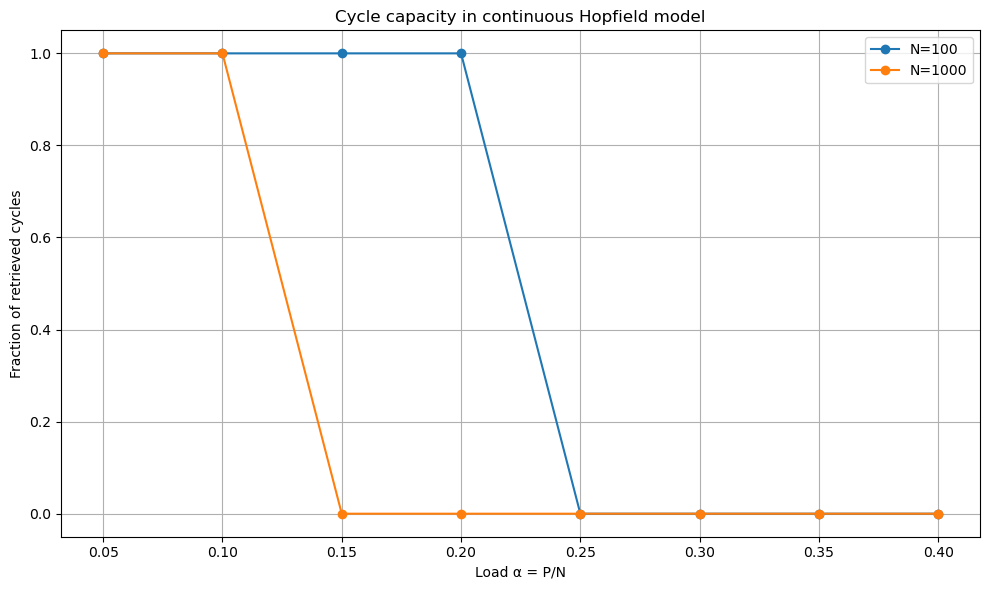

In [22]:
def simulate_continuous_dynamics_early_stopping(W, patterns, x0, beta=4, tau=5, t_delay=0.5, dt=0.5, T=100):
    """
    Simulate the continuous-time dynamics of the cyclic Hopfield model with early stopping.

    Input:  
            W =  Matrix of synaptic weights of size (N, N). (np.ndarray)
            patterns = Matrix of patterns of size (P, N), each row representing a pattern. (np.ndarray)
            x0= Initial state of the network, vector of size (N, ). (float)
            beta = Inverse of temperature, influences tanh slope. (float)
            tau =System time constant. (float)
            t_delay = Delay (in ms) in network feedback. (float)
            dt= Simulation time step (in ms). (float)
            T=  Total simulation time (in ms). (float)
    Ouput:  
            True or false depending on the retrieval state
    """
    N = W.shape[0]
    P = patterns.shape[0]
    time_steps = int(T / dt)
    delay_steps = int(t_delay / dt)

    x = np.zeros((time_steps, N))
    overlaps = np.zeros((time_steps, P))

    # Initialize delay history with x0
    for k in range(delay_steps + 1):
        x[k] = x0.copy()
        for mu in range(P):
            overlaps[k, mu] = np.dot(patterns[mu], x[k]) / N

    # Track dominant pattern over time
    dominant_indices = [np.argmax(overlaps[delay_steps])]
    last_dominant = dominant_indices[0]

    for k in range(delay_steps, time_steps - 1):
        # Continuous update
        delayed_input = x[k - delay_steps]
        tanh_input = np.tanh(beta * (W @ delayed_input))
        dx_dt = (-x[k] + tanh_input) / tau
        x[k + 1] = x[k] + dt * dx_dt

        # Compute overlaps
        for mu in range(P):
            overlaps[k + 1, mu] = np.dot(patterns[mu], x[k + 1]) / N

        # Update dominant index if changed
        current_dominant = np.argmax(overlaps[k + 1])
        if current_dominant != last_dominant:
            dominant_indices.append(current_dominant)
            last_dominant = current_dominant

            # Early stopping check
            if len(dominant_indices) >= P:
                expected = [(dominant_indices[0] + i) % P for i in range(P)]
                recent = dominant_indices[-P:]
                if recent == expected:
                    return True  
                elif len(dominant_indices) > 2 * P:
                    return False  

    return False  


def estimate_cycle_capacity_continuous(N_list=[100, 1000], alpha_list=np.arange(0.05, 0.45, 0.05),
                                       beta=4, tau=5, dt=0.5, reps=5):
    '''
    Estimates the cycle retrieval capacity of a continuous-time cyclic Hopfield network.
    For each combination of network size and load (P/N), the function simulates the dynamics multiple times and computes the empirical
    success rate of complete cycle retrieval.
    Input:  
            N_list = List of neuron counts to test. (list[int])
            alpha_list = list of load values (alpha = P/N). (np.ndarray)
            beta = inverse temperature for tanh. (float)
            tau = Time constant for neuron updates. (float)
            dt = Time step for simulation. (float)
            reps = Number of repetitions per configuration. (int)
    Ouput:
            None
    '''
    t_delay = 2 * tau
    results = {N: [] for N in N_list}

    for N in N_list:

        for alpha in alpha_list:
            P = int(alpha * N)
            T = 2 * P * t_delay  

            successes = 0
            for _ in range(reps):
                patterns = network_patterns(P, N)
                W = build_weight_matrix(patterns)
                x0 = patterns[0]
                success = simulate_continuous_dynamics_early_stopping(W, patterns, x0, beta, tau, t_delay, dt, T)
                if success:
                    successes += 1

            retrieval_probs=successes / reps
            print(f"N={N}, α={alpha:.2f}, success rate = {successes/reps:.2f}")
            results[N].append(retrieval_probs)


    plt.figure(figsize=(10, 6))
    for N in N_list:
        plt.plot(alpha_list, results[N], marker='o', label=f"N={N}")
    plt.xlabel("Load α = P/N")
    plt.ylabel("Fraction of retrieved cycles")
    plt.title("Cycle capacity in continuous Hopfield model")
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()
estimate_cycle_capacity_continuous()

<span style="color:#0A74DA">

Answer:

As for question 1.3, the graph obtained shows us that the probability of recovery of a cycle is 1 for low values of $\alpha$, then decreases fast as $\alpha$ increases until reach 0.

Roughly estimating that the capacity of the cycle is the largest value of $\alpha$ for which the probability of recovery is still 1 or very close to 1, we obtain that for the two curve, the capacity is around 0.10. The two models seems two have similar capacity. However, the model with N=1000 curve decrease sharply while the N=100 presents a smoother decrease. As seen in question 1.4, the fluctuations due to randomness average out more effectively resulting in sharper transitions for larger models. Therefore, the decrease is behaving as we expected.

Comparing with the results of the question 1.3, the probability of successful cycle retrieval drops significantly earlier in the continuous hopfield model (using $T = 1P \tau_{delay}$) than in the discrete case. For N=1000, cycle retrieval remains perfect up to only $\alpha =0.10$, but completely fails at $\alpha =0.15$ (against respectively 0.25 and 0.30 for discrete case). For N=100, the retrieval probability begins degrading at $\alpha =0.10$ and declines more gradually, reaching zero beyond $\alpha =0.30$ (against respectively 0.20 and 0.35 for discrete case). This suggests that the continuous dynamics retrieve fewer cycles, potentially due to slower convergence or a less pronounced separation between attractor states in the time-limited setting.


**2.4**. (Bonus) In the classical Hopfield network as covered in the class, there are also fixed points at states in between the patterns (e.g. $x_i^* = \frac{1}{2}(p_1 + . . . + p_M)$), with the stability of the fixed point depending on if the number of patterns used for the state (M) is odd or even. Test if this also holds in the cyclic dynamic Hopfield model from the exercise. (Either three activations in a single cycle, or preferably three cycles of different length simultaneously.)

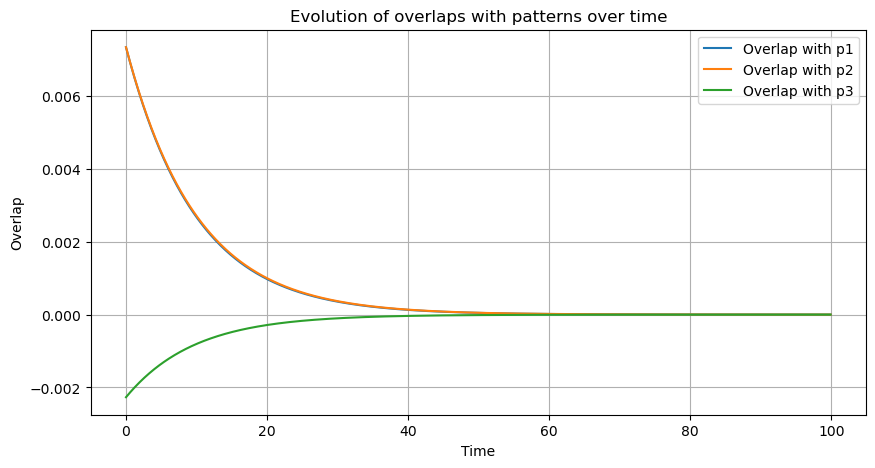

In [23]:
N = 100                     
P = 3                       
tau = 10                    
T_total = 100               
dt = 0.1                    
steps = int(T_total / dt)

# Generate orthogonal-like patterns (for simplicity)
patterns = [np.random.choice([-1, 1], size=N) for _ in range(P)]

# Normalize patterns
patterns = [p / np.linalg.norm(p) for p in patterns]

# Build the cyclic weight matrix: W_cyclic = sum_{mu} p_{mu+1} p_{mu}^T
W = np.zeros((N, N))
for mu in range(P):
    W += np.outer(patterns[(mu+1)%P], patterns[mu])
W /= N

# Initial state: MIXED STATE
x = 0.5 * (patterns[0] + patterns[1])
x = x / np.linalg.norm(x)  

# Activation function (tanh for continuous model)
def activation(x):
    return np.tanh(x)

# Store dynamics
trajectory = np.zeros((steps, N))

# Simulate continuous dynamics
for t in range(steps):
    dx = (-x + W @ activation(x)) / tau
    x += dt * dx
    trajectory[t] = x

# --- Analysis: Compare to original patterns ---
overlaps = np.array([[np.dot(trajectory[t], p) / N for p in patterns] for t in range(steps)])


plt.figure(figsize=(10, 5))
for mu in range(P):
    plt.plot(np.arange(steps)*dt, overlaps[:, mu], label=f'Overlap with p{mu+1}')
plt.title('Evolution of overlaps with patterns over time')
plt.xlabel('Time')
plt.ylabel('Overlap')
plt.legend()
plt.grid(True)
plt.show()


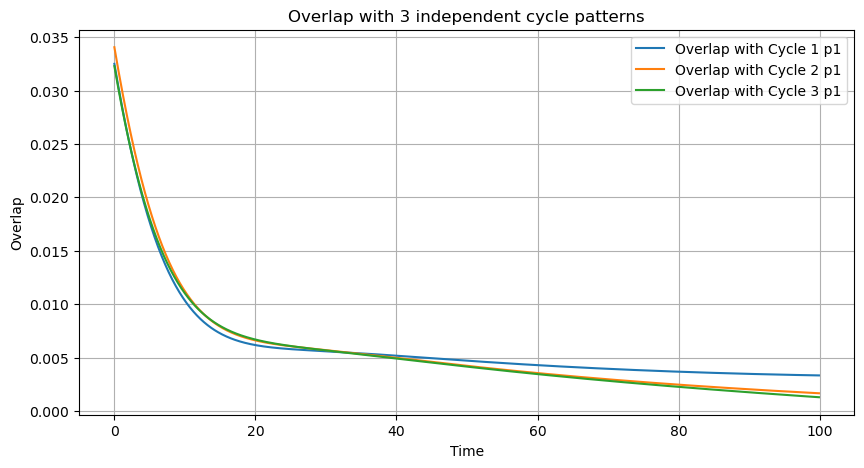

In [24]:
N = 300                     
P_per_cycle = 3             
C = 3                       
tau = 10
dt = 0.1
T_total = 100
steps = int(T_total / dt)

# Generate C cycles
cycles = []
for c in range(C):
    cycle = [np.random.choice([-1, 1], size=N) for _ in range(P_per_cycle)]
    cycles.append(cycle)

# Build total weight matrix by summing independent cyclic connections
W = np.zeros((N, N))
for cycle in cycles:
    for mu in range(P_per_cycle):
        W += np.outer(cycle[(mu+1)%P_per_cycle], cycle[mu])
W /= N

# Initial state: superposition of one pattern from each cycle
x = np.zeros(N)
for c in range(C):
    x += cycles[c][0]  # take first pattern of each cycle
x = x / np.linalg.norm(x)

# Activation function
def activation(x): return np.tanh(x)

# Record trajectory
trajectory = np.zeros((steps, N))

# Run dynamics
for t in range(steps):
    dx = (-x + W @ activation(x)) / tau
    x += dt * dx
    trajectory[t] = x

# Measure overlap with first pattern of each cycle
overlaps = np.zeros((steps, C))
for c in range(C):
    p = cycles[c][0]
    overlaps[:, c] = [np.dot(trajectory[t], p)/N for t in range(steps)]


plt.figure(figsize=(10, 5))
for c in range(C):
    plt.plot(np.arange(steps)*dt, overlaps[:, c], label=f'Overlap with Cycle {c+1} p1')
plt.title("Overlap with 3 independent cycle patterns")
plt.xlabel("Time")
plt.ylabel("Overlap")
plt.legend()
plt.grid(True)
plt.show()


<span style="color:#0A74DA">

Answer:

In the cyclic dynamic Hopfield model, initializing the system with a mixed state did not lead to a stable fixed point in our two tests carried out (using three patterns in a single cycle and three independent cycles). On the contrary, the network quickly evolved towards one of the learned patterns (cycle 2 in figure 2) or continued to run as expected (figure 1).
This behavior seems consistent with the design of the cyclic Hopfield model, where the dynamics are explicitly oriented towards following the sequence of patterns, making intermediate mixed states unstable. Thus, mixed states are not stable attractors in the cyclic Hopfield model, in contrast to the classical model where mixed states between patterns (such as the average of several stored patterns) can become fixed points, their stability depending on the combination of an even or odd number of patterns.

## Ex 3. Dimensionality analysis

An experimentalist often only has access to a recording of the activity of the neurons, without knowing the underlying connectivity structure or dimensionality of the dynamics. Simply looking at the activity itself can make it difficult to understand what the network is doing, especially in complex, real-world scenarios. As such, it is a major challenge in neuroscience to find ways to understand or explain the computations or processing in large networks of neurons. In this section, we will be applying a simple dimensionality reduction technique to see if we can correctly retrieve the dimensionality of the underlying dynamics.

### Principal Component Analysis
The main goal behind PCA is to find a set of components (like patterns) along which the neuronal state most varies over time, with the idea being that axes along which the state varies are relevant for the functioning of the network. Suppose that we want to represent our N-dimensional states as a combination of a small number of components K ≤ N. That is, we want to find vectors $\{\vec{v^1}, ..., \vec{v^K} | \vec{v^k} \in R^N \}$ and weights (also called loadings) $\{l_1(t), ..., l_K(t) \}$ such that
\begin{equation}
	x_i(t) \approx \sum_{k=1}^{K} v_i^{k} l_k(t)
\tag{7}
\end{equation}
This formulation should look very familiar to you. It is the same formulation as how the input to a neuron $i$ can be written as a sum over patterns and overlap variables as in Ex. 0.2, except in this case we have an approximation. Equality can generally only be obtained when $K = N$.

In PCA, the directions $\vec{v^k}$ are exactly the directions in the N-dimensional space in which the neuronal state $\vec{x}(t)$ most varies over time, with higher $k$ components having smaller contributions to the total sum. The vectors $\vec{v^k}$ are obtained exactly as the eigenvectors of the cross-covariance matrix $C \in \mathbb{R}^{N×N}$ of the neuronal states  $\vec{x}(t)$, ordered by the magnitude of the corresponding eigenvalues in decreasing order.
\begin{equation}
	\mathbf{C}_{ij} = \mathbf{Cov}(x_i, x_j)
\tag{8}
\end{equation}

\begin{equation}
	\mathbf{C} \vec{v}^k = \lambda_k \vec{v}^k
\tag{9}
\end{equation}

**3.1**. Implement a function that calculates the cross-covariance matrix $\mathbf{C}$ and returns the eigenvalues and eigenvectors of $\mathbf{C}$ in decreasing order of importance.

**Hint:** You may use the functions numpy.cov and numpy.linalg.eigh. Have a look at the documention for how to correctly use these functions.
To get a low-dimensional approximation of our data we need to find the loadings $l_k(t)$. As the vectors $\vec{v}^k$ are orthonormal, the loading for component $k$ is exactly the overlap between the neuronal state at time t and the corresponding vector:
\begin{equation}
	l_k(t) = \sum_{i=1}^{N} v_i^{k} x_i(t)
\tag{10}
\end{equation}

In [25]:
def perform_pca(X):
    """
    Perform PCA on the neuronal state data.
    Input:     
               X = Neuronal activity matrix of shape (N, T), where N is the number of neurons, and T is the number of time step. (np.ndarray)
    Ouput:     
               eigenvalues = sorted eigenvalues in descending order (shape (N,)). (np.ndarray)
               eigenvectors = corresponding eigenvectors (shape (N,N)), each column representing a principal component. (np.ndarray)
               loadings= projection of the data onto the principal components (shape (N,T)). (np.ndarray)
    """
    C = np.cov(X) #Compute the cross-covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(C) #Compute eigenvalues and eigenvectors (eigh used covariance matric is symmetric)

    #Sort eigenvalues and eigenvectors in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    #Project data onto eigenvectors (principal components)
    loadings = np.dot(eigenvectors.T, X)  # shape: (N, T)

    return eigenvalues, eigenvectors, loadings

**3.2**. Run a simulation using your model from Ex. 2, with N = 500 neurons, P = 10 patterns, T = 500 ms, initial state $x_i(0) = p^1_i$. Calculate the loadings $l^k(t)$ for the first $P$ components $(k = 1, ..., P)$ using the definitions and your functions from above, and produce a single plot showing how the loadings vary over time, similar to the plot of Ex. 2.2. Comment on the observed behaviour and on how it compares to the plot of overlap variables.
Despite the seeming similarity between Eqs. (3) and (10), the trajectories of $l^k(t)$ may look very different from those of $m^\mu(t)$. However, this does not say anything about the quality of the approximation of $x$ as defined in Eq. (7).

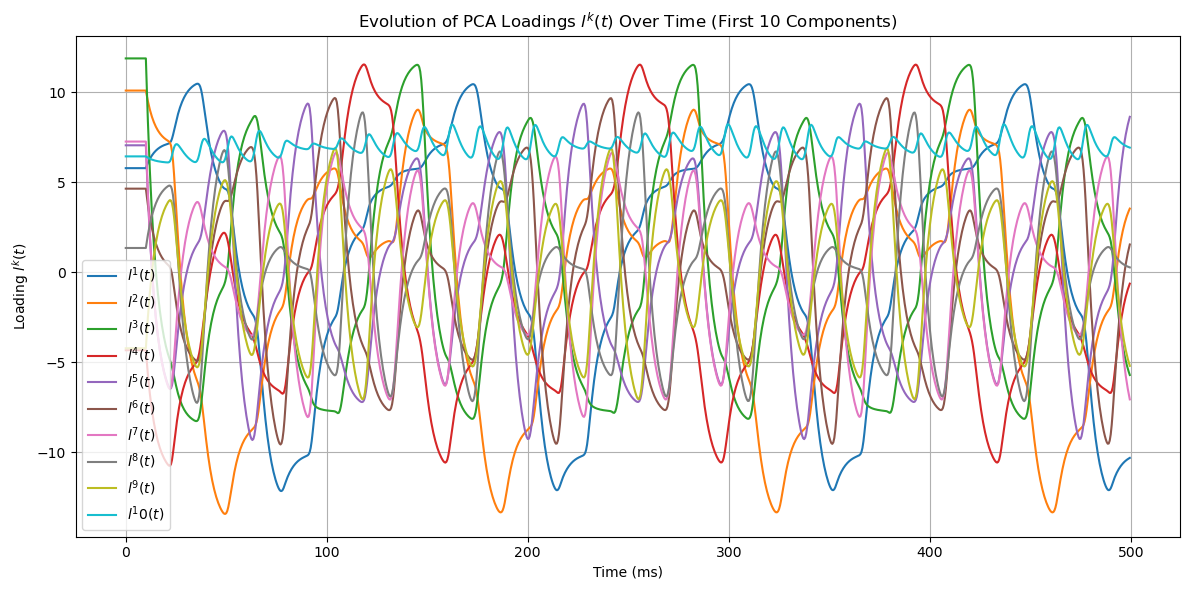

In [34]:
N = 500
P = 10
T = 500  # ms
dt = 0.5
tau = 5
t_delay = 2 * tau  # 10 ms
beta = 4

patterns = network_patterns(P, N)
W = build_weight_matrix(patterns)
x0 = patterns[0]
x_time, overlaps, time = simulate_continuous_dynamics(W, patterns, x0, beta, tau, t_delay, dt, T)

# Transpose x_time for PCA (shape: N x T)
X = x_time.T  # shape: (N, T)

_, _, loadings = perform_pca(X)

plt.figure(figsize=(12, 6))
for k in range(P):
    plt.plot(time, loadings[k], label=f"$l^{k+1}(t)$")
plt.xlabel("Time (ms)")
plt.ylabel("Loading $l^k(t)$")
plt.title("Evolution of PCA Loadings $l^k(t)$ Over Time (First 10 Components)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:#0A74DA">

Answer:

While $m^\mu(t)$ measures alignment with specific stored models,
$l^k(t)$ measures projection onto unsupervised principal components of the data.
$l^k(t)$ loads exhibit wave-like oscillatory patterns, reflecting the way the state moves cyclically through the subspace covered by the stored patterns.
The components that capture the majority of the dynamics have strong, smooth curves in the first few loads, while higher loads have flatter lines.
Thus, the $l^k(t)$ component that is flat or decreasing rapidly contributes little to the dynamics.

Both l k(t) and m μ(t) are similar in formulation, but the plots are different. The different m μ(t) variables present similar but shifted curves, while the l k(t) variables present more random curves that change amplitude according to their magnitude.

**3.3**. Make two reconstructions of the neuronal state $x^i(t)$ using Eq. (7) from the first $K$ components $\vec{v}^k$ and loadings $l^k(t)$, for $K = P/2$ and $K = P$. Produce a single plot showing together the original and two reconstructions of the time evolution of the neuronal state for one example neuron. How do the two reconstructions compare?
If we want to know how many components we need to accurately describe the data, we could of course make comparisons as done in the above exercise. But there is a much simpler way. PCA is constructed to exactly capture as much variance of the data as possible through several components. The variance that is captured by each component $k$ is actually exactly the square of the corresponding eigenvalue $\lambda_k$ as obtained in Ex. 3.1 above. The fraction of explained variance by the k-th component can be calculated as
\begin{equation}
	\% \mathbf{EV}(k)=\frac{(\lambda_k)^2}{\sum_{k=1}^{N} (\lambda_k)^2}
\tag{11}
\end{equation}

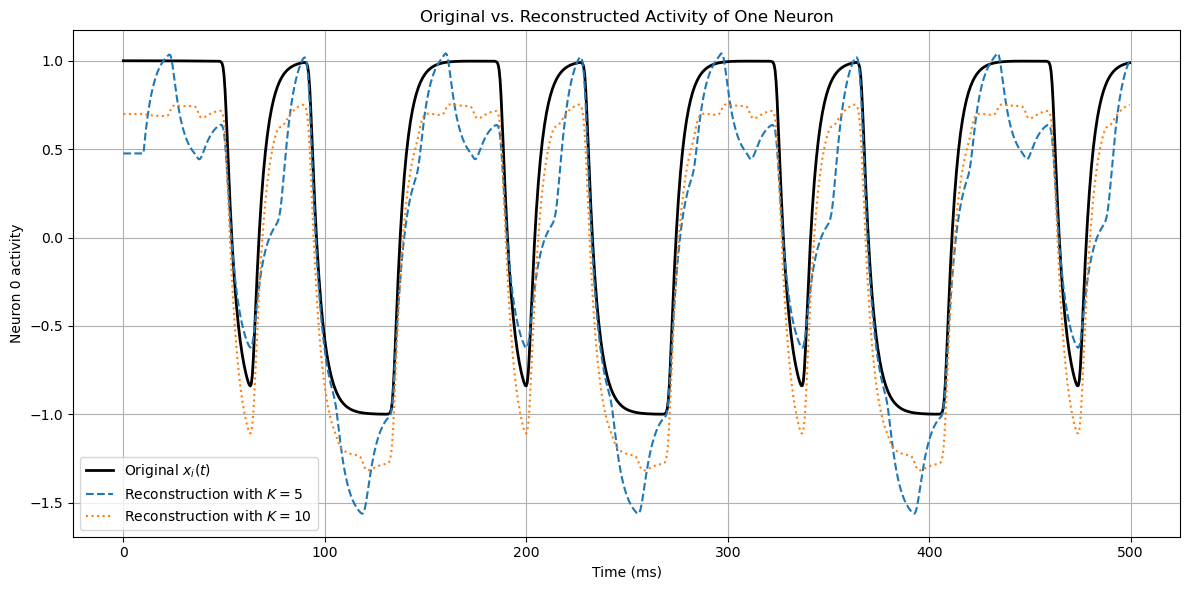

Explained variance with K = 5: 85.37%
Explained variance with K = 10: 100.00%


In [23]:
neuron_index = 0  # example neuron index

# Number of components to reconstruct with
K1 = P // 2  
K2 = P      

# Eigenvectors (shape (N, N)) and loadings (shape (N, T)) from previous PCA
eigenvalues, eigenvectors, loadings = perform_pca(X)

def reconstruct_x_i(eigenvectors, loadings, neuron_index, K):
    """
    Reconstruct the activity of a single neuron over time using the first K components.
    Input:  
            eigenvectors = Matrix of shape (N,N) where each column is principal component. (np.ndarray)
            loadings = Matrix of shape (N, T), projection of the original data onto the principal components. (np.ndarray)
            neuron_index = Index of the neuron to reconstruct (0-based). (int)
            K= Number of principal components to use in the reconstruction. (int)
    Output:
            x_i_t_approx = reconstructed time series for the specified neuron (shape (T, )). (np.ndarrayf)
    """
    v_k = eigenvectors[neuron_index, :K]  
    l_k_t = loadings[:K, :]     
    x_i_t_approx = np.dot(v_k, l_k_t)          
    return x_i_t_approx

# Reconstructions
x_true = X[neuron_index, :] # original activity
x_recon_k1 = reconstruct_x_i(eigenvectors, loadings, neuron_index, K1)
x_recon_k2 = reconstruct_x_i(eigenvectors, loadings, neuron_index, K2)


plt.figure(figsize=(12, 6))
plt.plot(time, x_true, label="Original $x_i(t)$", color="black", linewidth=2)
plt.plot(time, x_recon_k1, label=f"Reconstruction with $K = {K1}$", linestyle="--")
plt.plot(time, x_recon_k2, label=f"Reconstruction with $K = {K2}$", linestyle=":")
plt.xlabel("Time (ms)")
plt.ylabel(f"Neuron {neuron_index} activity")
plt.title("Original vs. Reconstructed Activity of One Neuron")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Explained variance calculation
explained_variance_ratio = (eigenvalues ** 2) / np.sum(eigenvalues ** 2)
ev_k1 = np.sum(explained_variance_ratio[:K1])
ev_k2 = np.sum(explained_variance_ratio[:K2])
print(f"Explained variance with K = {K1}: {ev_k1*100:.2f}%")
print(f"Explained variance with K = {K2}: {ev_k2*100:.2f}%")


<span style="color:#0A74DA">

Answer:

The K = P reconstruction corresponds more closely to the original x i(t) than the K =K/2 case, although it is slightly shifted downwards as the PCA with up to P captures much of the dynamics. With more components, we get a more accurate reconstruction.
The figures for explained variance indicate the amount of information retained in the approximation, and once again we see that for K=P, we have 100% explained variance, whereas it drops to 87.37% for K=P/2.

**3.4**. Produce a bar plot of the $\% \mathbf{EV}$ as a function of component number (up to $K = 20$). What do you observe? And can you correctly estimate from this the number of patterns $P$ used in the network?


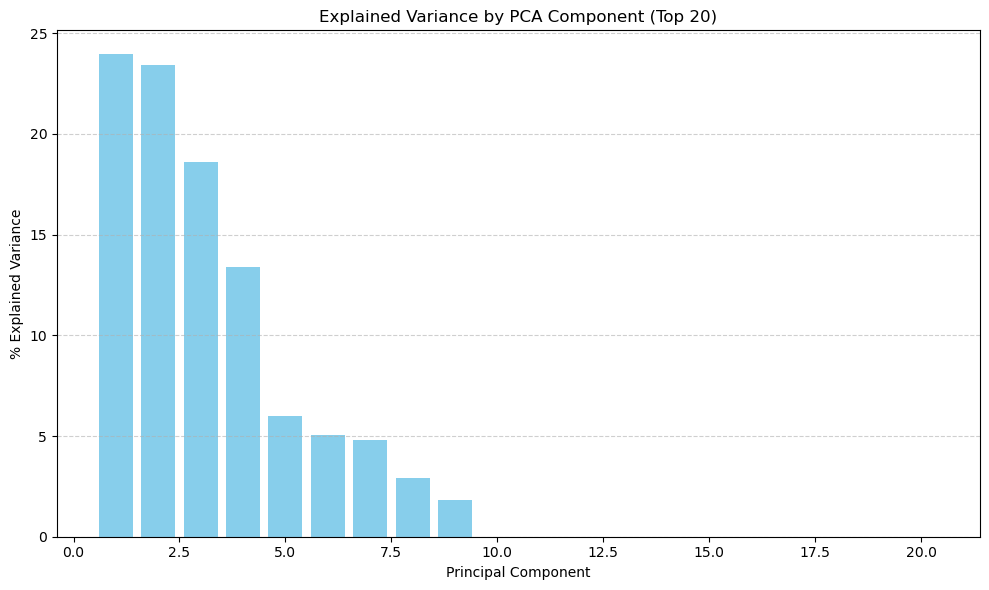

Cumulative explained variance up to P=10: 100.00%


In [24]:
explained_variance_ratio = (eigenvalues ** 2) / np.sum(eigenvalues ** 2)

K_plot = 20
components = np.arange(1, K_plot + 1)
ev_percent = 100 * explained_variance_ratio[:K_plot]  # convert to percent

plt.figure(figsize=(10, 6))
plt.bar(components, ev_percent, color='skyblue')
plt.xlabel("Principal Component")
plt.ylabel("% Explained Variance")
plt.title("Explained Variance by PCA Component (Top 20)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"Cumulative explained variance up to P={P}: {100*np.sum(explained_variance_ratio[:P]):.2f}%")


<span style="color:#0A74DA">

Answer:

We can see that 100% of the variance is explained for P=10. Components above P explain much less variance. Thus, models up to P=10 determine the dynamics of the system.
Therefore, the number of patterns used in the network is $P=10$.

**3.5**. In general, explain a procedure for how an experimentalist can use PCA to estimate the dimensionality of recorded data.

<span style="color:#0A74DA">

Answer:

PCA is used in this case to estimate dimensionality by determining the number of principal components needed to explain most of the variance in the recorded data.

The complete procedure for using this PCA method can be divided into several steps:
* Record the time-varying activity of $N$ units (e.g. neurons), over a period of $T$ time points and organize them in a matrix $\mathbf{X} \in \mathbb{R}^{N×T}$ where each row is a neuron and each column a time point (collect of data).
* Center the data on the mean, i.e. subtract the mean of each neuron's activity over time:
\begin{equation*}
	\mathbf{X}_{centered} =  \mathbf{X} -\frac{1}{n} \sum_{i=1}^{n} X_{i}
\end{equation*}
* Calculate the covariance matrix:
\begin{equation*}
	\mathbf{C} = Cov(\vec{v}(t)) = \frac{1}{T} \mathbf{X}_{centered} \mathbf{X}_{centered}^T
\end{equation*}
* Perform PCA by calculating the eigenvalues $\lambda_k$ and eigenvectors $\vec{v}^k$ of $\mathbf{C}$. Then sort them in descending order of eigenvalue importance.
* Calculate the variance explained for the k component with :
\begin{equation*}
	\% \mathbf{EV}(k)=\frac{(\lambda_k)^2}{\sum_{k=1}^{N} (\lambda_k)^2}
\end{equation*}
* Estimate dimensionality using diagrams to represent explained variance. From these diagrams, you can count the number of components that explain a certain threshold of variance explained, e.g. 95% of the total variance.

This is the procedure we have generally followed in Exercise 3.

**3.6**. (Bonus) If the neuronal dynamics can be understood through the dynamics of the P overlap variables $m^\mu(t)$, why might we expect the neuronal state itself to be mostly constrained to a P-dimensional subspace? And why is the subspace spanned by the patterns the only relevant part for the dynamics? 

**Hint:** Consider again your answer to Ex. 0.2 for the first part. For the second, consider what happens to any neuronal state that is (partly) orthogonal to all patterns.

<span style="color:#0A74DA">

Answer:

We might expected the neuronal state itsel to be mostly constrained to a P-dimensional subspace because the state $x(t)$ can be well approximated by a linear combination of the patterns:
\begin{equation*}
	x(t) \approx  \sum_{\mu=1}^{P} m^\mu(t) p^\mu
\end{equation*}
, i.e. lives in the span of the P patterns.
This is the case if the dynamics are governed primarily by the evolution of the $m^\mu(t)$. Because in fact, the overlap variables $m^\mu(t) =\frac{1}{N}\sum_{i=1}^{N} x_i(t) p_i^\mu$ measure the projection of the neural state $x(t)$ onto each stored pattern $p^\mu$.

And the subspace spanned by the patterns is the only relevant part for the dynamics because the orthogonal components are dynamically silent. In fact, a component of $x(t)$ that is orthogonal to all patterns $p^\mu$ does not influence the dynamics at all. When computing $\mathbf{W} x(t)$, the synaptic input is based on $\mathbf{W} = \sum_{\mu} p^{\mu+1} (p^\mu)^T$. Therefore, any part of $x(t)$ that is orthogonal to all $p^\mu$ will get projected out by $\mathbf{W}$: $W x_{\perp}(t) = 0$.
Thus, only the part of x(t) that lies within the span of the patterns affects the evolution.
